In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import *
%matplotlib inline

In [3]:
df = pd.read_csv('merged_df_norm_sents.csv', index_col = 0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 895 entries, 0 to 894
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Location         895 non-null    object 
 1   School           895 non-null    object 
 2   Course           895 non-null    object 
 3   Degree_type      895 non-null    object 
 4   Pace             632 non-null    object 
 5   Duration         567 non-null    object 
 6   Language         895 non-null    object 
 7   Mode             849 non-null    object 
 8   Description      895 non-null    object 
 9   Link             895 non-null    object 
 10  Country          895 non-null    object 
 11  City             895 non-null    object 
 12  Continent        895 non-null    object 
 13  Duration_years   895 non-null    float64
 14  InEnglish        895 non-null    bool   
 15  Lang_primary     895 non-null    object 
 16  Introduction     895 non-null    object 
 17  Curriculum      

In [4]:
df['Duration_years'] = df['Duration_years'].astype(float)

In [5]:
df.duplicated().sum()

0

In [6]:
keywords = ['data','intelligence', 'analytics']
df1 = pd.DataFrame()
for i in range(0,len(df)):
    for kw in keywords:
        if kw in df['Course'][i].lower():
            df1 = pd.concat([df1, df.loc[i]], axis = 1)
            
df1 = df1.transpose()
df1.drop_duplicates(keep = 'first', inplace = True, ignore_index = True)
print(df1.shape)
df1.head(3)

(96, 22)


,Location,School,Course,Degree_type,Pace,Duration,Language,Mode,Description,Link,...,Continent,Duration_years,InEnglish,Lang_primary,Introduction,Curriculum,Careers,Program_outcome,Merged_desc,Norm_sents
0,"Berlin, Germany",GISMA University of Applied Science,"BSc Data Science, AI & Digital Business",BSc,Full-time,36 months,English,Campus,This unique combination of business and techno...,https://www.bachelorstudies.com/BSc-Data-Scien...,...,Europe,3,True,English,Apply Now This unique combination of business ...,### Curriculum#### How will you study?GISMA Bu...,NaN,### Program Outcome#### **What will you learn?...,Apply Now This unique combination of business ...,['apply unique combination business technology...
1,"Hamburg, Germany +1 More",University of Europe for Applied Sciences,B.Sc. Digital Business & Data Science,BSc,Full-time,6 semesters,English,Campus,Learn how to apply cutting-edge analytics tool...,https://www.bachelorstudies.com//B.Sc.-Digital...,...,Europe,3,True,English,Learn how to apply cutting-edge analytics tool...,NaN,NaN,NaN,Learn how to apply cutting-edge analytics tool...,['learn apply cut edge analytics tool big data...
2,"Barcelona, Spain +1 More",Harbour.Space University,Bachelor of Data Science,Bachelor,Full-time,3 years,English,Campus,The Data Science programme sets out to develop...,https://www.bachelorstudies.com/Bachelor-of-Da...,...,Europe,3,True,English,This program is taught in ENGLISH. The Data Sc...,### Curriculum#### First YearIn the first year...,NaN,NaN,This program is taught in ENGLISH. The Data Sc...,"['program teach english', 'data science bachel..."


In [7]:
keywords2 = ['software', 'development']
df2 = pd.DataFrame()
for i in range(0,len(df)):
    for kw in keywords2:
        if kw in df['Course'][i].lower():
            if df['Course'][i] not in df1['Course']:
                df2 = pd.concat([df2, df.loc[i]], axis = 1)
            
df2 = df2.transpose()
df2.drop_duplicates(keep = 'first', inplace = True, ignore_index = True)
print(df2.shape)
df2.head(3)

(120, 22)


,Location,School,Course,Degree_type,Pace,Duration,Language,Mode,Description,Link,...,Continent,Duration_years,InEnglish,Lang_primary,Introduction,Curriculum,Careers,Program_outcome,Merged_desc,Norm_sents
0,"Jelgava, Latvia",Latvia University of Life Sciences and Technol...,Professional Bachelor in Information Technolog...,Bachelor,Full-time,4 years,English,Campus,Information technologies for sustainable devel...,https://www.bachelorstudies.com//Professional-...,...,Europe,4,True,English,Information technologies for sustainable devel...,NaN,### Career Opportunities#### Career prospects ...,NaN,Information technologies for sustainable devel...,['information technology sustainable developme...
1,"Venlo, Netherlands",Fontys University of Applied Sciences,Bachelor in Software Engineering and Business ...,BSc,Full-time,48 months,"English, German",Campus,"During the joint propaedeutic phase, you will ...",https://www.bachelorstudies.com/Bachelor-in-So...,...,Europe,4,True,English,We&rsquo;re living in a &lsquo;connected world...,### Curriculum#### Content of the programmeDur...,NaN,### Program Outcome#### What to expect from us...,We're living in a world'. People are connected...,['people connect social medium device connect ...
2,"Glasgow, United Kingdom",Glasgow Caledonian University - The School of ...,BSc (Hons) Software Development for Business,BSc,Full-time,4 years,English,Campus,The first Software Development Tech Industry G...,https://www.bachelorstudies.com/BSc-(Hons)-Sof...,...,Europe,4,True,English,Accredited by: BCS Tech Gold Tech Partnership ...,### Curriculum### What you will studyYear 1Fun...,NaN,NaN,Accredited by: BCS Tech Gold Tech Partnership ...,['accredit bcs tech gold tech partnership gcu ...


In [8]:
check = pd.concat([df1,df2])
check.reset_index(drop = True, inplace = True)
check.duplicated().sum()

2

In [9]:
for i in range(0,len(check)):
    if check.duplicated()[i]:
        print(i)
        print(check['Course'][i])

99
BA in Development Studies and Data Analytics
101
Bachelor in Software and Data Engineering


In [10]:
df2[df2['Course'] == 'BA in Development Studies and Data Analytics']

,Location,School,Course,Degree_type,Pace,Duration,Language,Mode,Description,Link,...,Continent,Duration_years,InEnglish,Lang_primary,Introduction,Curriculum,Careers,Program_outcome,Merged_desc,Norm_sents
3,"Manchester, United Kingdom",University of Manchester,BA in Development Studies and Data Analytics,BA,Full-time,3 - 4 years,English,Campus,Explore development studies and data analytics...,https://www.bachelorstudies.com/BA-in-Developm...,...,Europe,3.5,True,English,Explore development studies and data analytics...,### CurriculumThe BA(Econ) course is an interd...,### Career OpportunitiesWe have an excellent r...,NaN,Explore development studies and data analytics...,['explore development study data analytics rea...


In [11]:
df2[df2['Course'] == 'Bachelor in Software and Data Engineering']

,Location,School,Course,Degree_type,Pace,Duration,Language,Mode,Description,Link,...,Continent,Duration_years,InEnglish,Lang_primary,Introduction,Curriculum,Careers,Program_outcome,Merged_desc,Norm_sents
5,"Belgrade, Serbia +1 More",Singidunum University,Bachelor in Software and Data Engineering,Bachelor,Full-time,4 years,"English, Serbian",Campus,Our Software and Data Engineering study progra...,https://www.bachelorstudies.com/Bachelor-in-So...,...,Europe,4,True,English,Rapid technological innovations are bringing t...,NaN,NaN,NaN,Rapid technological innovations are bringing t...,['rapid technological innovation bring transfo...


In [12]:
df1.drop(axis = 0, index = [19,61], inplace = True)
df1.reset_index(drop = True, inplace = True)

In [13]:
df2.drop(axis = 0, index = [3,5], inplace = True)
df2.reset_index(drop = True, inplace = True)

In [14]:
check = pd.concat([df1,df2])
check.reset_index(drop = True, inplace = True)
check.duplicated().sum()

0

In [48]:
df1_text.to_csv('data_related')
df2_text.to_csv('dev_related')

In [45]:
df1_text = df1.drop(['Location','Language','Duration','Description', 'Link'], axis = 1)
df2_text = df2.drop(['Location','Language','Duration','Description', 'Link'], axis = 1)

In [15]:
df1_visu = df1[['Continent','Country','City', 'School', 'Course', 'Degree_type', 'Pace', 'Duration_years','Mode', 'InEnglish', 'Lang_primary']].copy()
df2_visu = df2[['Continent','Country','City', 'School', 'Course', 'Degree_type', 'Pace', 'Duration_years','Mode', 'InEnglish', 'Lang_primary']].copy()

In [18]:
print(f'data related courses: {len(df1)}')
print(f'development related courses: {len(df2)}')

data related courses: 94
decelopment related courses: 118


In [19]:
df1_visu['Duration_years'] = df1_visu['Duration_years'].astype(float)
df2_visu['Duration_years'] = df2_visu['Duration_years'].astype(float)

In [20]:
pd.concat([df1_visu['Duration_years'].describe(),df2_visu['Duration_years'].describe()], axis = 1, 
          keys = ['data','dev'])

,data,dev
count,94.000000,118.000000
mean,3.701319,3.615312
std,0.552092,0.634325
min,2.000000,1.500000
25%,3.110294,3.000000
50%,4.000000,3.789515
75%,4.000000,4.000000
max,5.000000,6.000000


In [21]:
df1_visu.describe(exclude = 'float')

,Continent,Country,City,School,Course,Degree_type,Pace,Mode,InEnglish,Lang_primary
count,94,94,94,94,94,94,81,92,94,94
unique,5,30,76,84,85,4,2,3,2,5
top,Europe,USA,Hung Hom,Heriot-Watt University Dubai,Bachelor of Science in Data Science,BSc,Full-time,Campus,True,English
freq,40,26,4,4,3,47,78,79,88,88


In [22]:
df2_visu.describe(exclude = 'float')

,Continent,Country,City,School,Course,Degree_type,Pace,Mode,InEnglish,Lang_primary
count,118,118,118,118,118,118,93,112,118,118
unique,5,35,99,109,86,3,2,3,2,8
top,Europe,United Kingdom,London,University of Roehampton London,Bachelor in Software Engineering,Bachelor,Full-time,Campus,True,English
freq,62,24,8,2,11,58,91,98,103,100


In [23]:
pd.concat([df1_visu['Continent'].value_counts(),df2_visu['Continent'].value_counts()], axis = 1, 
          keys = ['data','dev'], join = 'outer')

,data,dev
Europe,40,62
North America,27,28
Asia,20,25
Africa,4,2
Oceania,3,1


In [24]:
pd.concat([df1_visu['Degree_type'].value_counts(),df2_visu['Degree_type'].value_counts()], axis = 1, 
          keys = ['data','dev'], join = 'outer')

,data,dev
BSc,47,56.0
Bachelor,40,58.0
BA,5,4.0
BBA,2,NaN


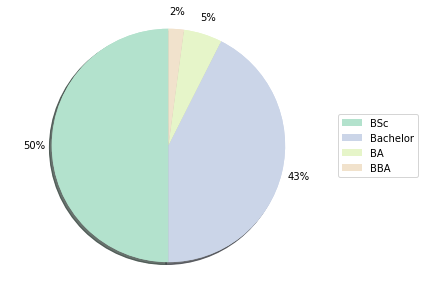

In [40]:
sizes = df1_visu['Degree_type'].value_counts()
labels = df1_visu['Degree_type'].value_counts().index
colors = ['#b3e2cd', '#cbd5e8', '#e6f5c9', '#f1e2cc']


fig1, ax1 = plt.subplots()
ax1.pie(sizes, autopct='%.0f%%', colors = colors, shadow=True, startangle=90, pctdistance=1.15)

patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)
plt.legend(patches, labels, loc = 'center left', bbox_to_anchor = (1.0,0.5))

ax1.axis('equal')  
plt.tight_layout()

plt.show()

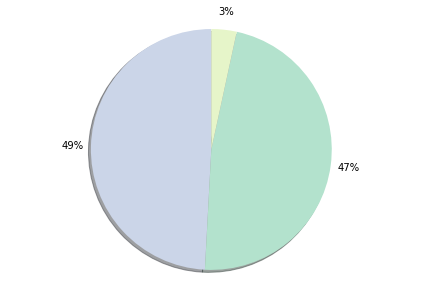

In [41]:
sizes = df2_visu['Degree_type'].value_counts()
labels = df2_visu['Degree_type'].value_counts().index
colors = [ '#cbd5e8','#b3e2cd','#e6f5c9']


fig1, ax1 = plt.subplots()
ax1.pie(sizes, autopct='%.0f%%', colors = colors, shadow=True, startangle=90, pctdistance=1.15)

ax1.axis('equal')  
plt.tight_layout()

plt.show()

In [28]:
countries = df2_visu['Country'].copy()
countries.value_counts()

United Kingdom          24
USA                     22
Germany                  8
Malaysia                 6
China                    5
Turkey                   4
Russia                   4
Canada                   3
Lithuania                3
Netherlands              3
United Arab Emirates     3
Denmark                  3
Spain                    3
Bulgaria                 2
Finland                  2
Malta                    2
Kazakhstan               2
Poland                   2
Portugal                 1
Ireland                  1
Fiji                     1
Latvia                   1
Oman                     1
Mexico                   1
Sweden                   1
Morocco                  1
Estonia                  1
Jamaica                  1
Japan                    1
Israel                   1
Ghana                    1
Nicaragua                1
Kyrgyzstan               1
Cyprus                   1
Albania                  1
Name: Country, dtype: int64

In [29]:
c_vals = countries.value_counts()
for i in c_vals.index:
    if c_vals[i] < 4:
        countries.replace(i, 'Countries posting less than 4 courses', inplace = True)

In [32]:
cmap = cm.get_cmap('Pastel2',8)

colors = []
for i in range(cmap.N):
    if i%2 == 0:
        rgba = cmap(i)
        # rgb2hex accepts rgb or rgba
        colors.append(matplotlib.colors.rgb2hex(rgba))
        
#colors.reverse()

colors

['#b3e2cd', '#cbd5e8', '#e6f5c9', '#f1e2cc']

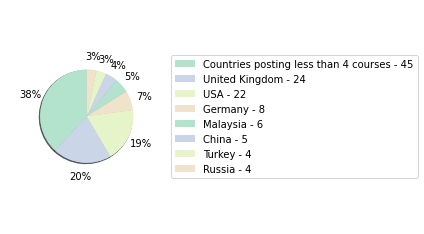

In [33]:
sizes = countries.value_counts()
labels = countries.value_counts().index
#colors = ['#f2f2f2','#e5d8bd','#fddaec','#ccebc5','#cccccc', '#fff2ae', '#cbd5e8', '#b3e2cd']

legend = []
for i in range(0,len(labels)):
    legend.append(f'{labels[i]} - {sizes[i]}')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, autopct='%.0f%%', colors = colors, shadow=True, startangle=90, pctdistance=1.3)

patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)
plt.legend(patches, legend, loc = 'center left', bbox_to_anchor = (1.0,0.5))

ax1.axis('equal')  
plt.tight_layout()

plt.show()